## Budget Sales Analysis

### Introduction-  Twilearn Internship Project

Project Title: __Budget Sales Analysis__

Technologies: __Business Intelligence__

Domain: __Retail & Sales__

Author: Akshaya

### 1. Business Task

To analysis the Budget Sales data, extract necessary information about Customers and Products based on combination of features to help potential buyers purchase the domain they want immediately without the hassle of contacting the seller directly.

### 1.1 Business Objectives

- Performing EDA through Python and find insights.
- Extract various information such as Budget, Sales, Variance. 
- Compare attributes of the dataset to extract necessary information about Products and Customers.
- Make Dashboard with extracted information from data.
- Find key metrics and factors and show relationship between attributes.



### 2. Raw Dataset

The Dataset used was provided in the Project Description Document, Twilearn.

__Database list:__

AdventureWorks_Database.xlsx

Budget.xlsx




### 3. Data Preparing And Processing

Using Python for preparing and processing the data. 

####  3.1 Preparing The Environment

Filtering out warnings, Importing important libraries, Displaying maximum rows and columns.

In [1]:
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import date

# Displaying maximum rows and columns
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

#### 3.2 Loading Data

In [2]:
# Loading the Dataset and reading Date Data
df = pd.ExcelFile('F:\Akshaya\Courses\Twilearn\Budget Sales Analysis\Data\Database1.xlsx')
Date_Data = pd.read_excel(df, 'Date')
Date_Data.head()

,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,2016-04-03,20160403,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,1,Sun,Weekend
1,2016-04-04,20160404,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,2,Mon,Weekday
2,2016-04-05,20160405,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,3,Tue,Weekday
3,2016-04-06,20160406,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,4,Wed,Weekday
4,2016-04-07,20160407,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,5,Thu,Weekday


In [3]:
# Reading and Loading Customer Data
Customer_Data = pd.read_excel(df, 'CustomerData')
Customer_Data.head()

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [4]:
# Reading and Loading Product Data
Product_Data = pd.read_excel(df, 'ProductData')
Product_Data.head()

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [5]:
# Reading and Loading Sales Data
Sales_Data = pd.read_excel(df, 'SalesData')
Sales_Data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.2700,286.2616
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,1912.1544,3399.9900,271.9992
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,1912.1544,3399.9900,271.9992
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,413.1463,699.0982,55.9279
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,1912.1544,3399.9900,271.9992


In [6]:
# Reading and Loading Territory Data
Territory_Data = pd.read_excel(df, 'TerritoryData')
Territory_Data.head()

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [7]:
# Reading and Loading Budget Data
Budget_Data = pd.read_excel(df, 'Budget')
Budget_Data = Budget_Data.iloc[2:, :]
Budget_Data.columns = Budget_Data.iloc[0]
Budget_Data = Budget_Data.iloc[1:]
Budget_Data.head()

2,Category,Subcategory,ProductName,ProductKey,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016",Grand Total
3,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
4,Accessories,Bike Stands,All-Purpose Bike Stand,486,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
5,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
6,Accessories,Cleaners,Bike Wash - Dissolver,484,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
7,Accessories,Fenders,Fender Set - Mountain,485,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670


In [8]:
# Checking Column Names of all Datasets
print('Date Columns:', Date_Data.columns)
print('Customer Columns:', Customer_Data.columns)
print('Product Columns:', Product_Data.columns)
print('Sales Columns:', Sales_Data.columns)
print('Territory Columns:', Territory_Data.columns)
print('Budget Columns:', Budget_Data.columns)

Date Columns: Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend'],
      dtype='object')
Customer Columns: Index(['CustomerKey', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance'],
      dtype='object')
Product Columns: Index(['ProductKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')
Sales Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrde

#### 3.3 Merging Data

In [9]:
# Merging Customer and Sales Data
Merged_Data = pd.merge(Sales_Data, Customer_Data, on = 'CustomerKey', how = 'inner')
# Merging Product Data
Merged_Data = pd.merge(Merged_Data, Product_Data, on = 'ProductKey', how = 'inner')
# Merging Territory Data
Merged_Data = pd.merge(Merged_Data, Territory_Data, on = 'SalesTerritoryKey', how = 'inner')
# Displaying Merged Data
Merged_Data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,Lucas,Collins,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,8108 Abbey Court,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,Richard,Bailey,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,5826 Limewood Pl.,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,Xavier,Martin,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,4539 Leeds Ct,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


#### 3.3 Data Handling and Cleaning

In [10]:
# Checking Data Types in the Dataset
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  FirstName       

In [11]:
# Checking Shape of the Dataset
Merged_Data.shape

(58189, 45)

In [12]:
# Checking Quantitative Spread of the Dataset
Merged_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductKey,58189.0,437.208304,118.099746,214.0000,358.0000,479.0000,529.0000,606.0000
CustomerKey,58189.0,18853.004640,5433.374315,11000.0000,14012.0000,18151.0000,23450.0000,29483.0000
PromotionKey,58189.0,1.043427,0.348948,1.0000,1.0000,1.0000,1.0000,14.0000
SalesTerritoryKey,58189.0,6.261716,2.960248,1.0000,4.0000,7.0000,9.0000,10.0000
SalesOrderLineNumber,58189.0,1.887453,1.018829,1.0000,1.0000,2.0000,2.0000,8.0000
OrderQuantity,58189.0,1.569386,1.047532,1.0000,1.0000,1.0000,2.0000,4.0000
UnitPrice,58189.0,413.888218,833.052938,0.5725,4.9900,24.4900,269.9950,3578.2700
TotalProductCost,58189.0,296.539185,560.171436,0.8565,3.3623,12.1924,343.6496,2171.2942
SalesAmount,58189.0,503.666270,941.462817,2.2900,8.9900,32.6000,539.9900,3578.2700
TaxAmt,58189.0,40.293303,75.317027,0.1832,0.7192,2.6080,43.1992,286.2616


In [13]:
# Checking for Duplicate Values in the Dataset
Merged_Data.duplicated().sum()

0

##### Missing Values

In [14]:
# Checking Missing Values in the Dataset
Merged_Data.isnull().sum()

ProductKey                  0
OrderDate                   0
ShipDate                    0
CustomerKey                 0
PromotionKey                0
SalesTerritoryKey           0
SalesOrderNumber            0
SalesOrderLineNumber        0
OrderQuantity               0
UnitPrice                   0
TotalProductCost            0
SalesAmount                 0
TaxAmt                      0
FirstName                   0
LastName                    0
FullName                    0
BirthDate                   0
MaritalStatus               0
Gender                      0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
Education                   0
Occupation                  0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
DateFirstPurchase           0
CommuteDistance             0
ProductName                 0
SubCategory                 0
Category                    0
StandardCost                0
Color     

In [15]:
# Checking Missing Value Percentage in the Dataset
Merged_Data.isnull().sum()*100/len(Merged_Data)

ProductKey               0.000000
OrderDate                0.000000
ShipDate                 0.000000
CustomerKey              0.000000
PromotionKey             0.000000
SalesTerritoryKey        0.000000
SalesOrderNumber         0.000000
SalesOrderLineNumber     0.000000
OrderQuantity            0.000000
UnitPrice                0.000000
TotalProductCost         0.000000
SalesAmount              0.000000
TaxAmt                   0.000000
FirstName                0.000000
LastName                 0.000000
FullName                 0.000000
BirthDate                0.000000
MaritalStatus            0.000000
Gender                   0.000000
YearlyIncome             0.000000
TotalChildren            0.000000
NumberChildrenAtHome     0.000000
Education                0.000000
Occupation               0.000000
HouseOwnerFlag           0.000000
NumberCarsOwned          0.000000
AddressLine1             0.000000
DateFirstPurchase        0.000000
CommuteDistance          0.000000
ProductName   

In [16]:
# Dropping the Column with Missing Values
Merged_Data = Merged_Data.drop('Color', axis = 1)

In [17]:
# Checking the Shape of Dataset
Merged_Data.shape

(58189, 44)

In [18]:
# Calculating the Gender Count
Merged_Data.Gender.value_counts()

M    29314
F    28875
Name: Gender, dtype: int64

In [19]:
# Replacing the Gender Values'F' and 'M' to 'Female' and 'Male'
Merged_Data['Gender'] = Merged_Data['Gender'].replace('F', 'Female')
Merged_Data['Gender'] = Merged_Data['Gender'].replace('M', 'Male')
Merged_Data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,Cole,Watson,"Watson, Cole",1946-08-22,S,Male,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,Arianna,Flores,"Flores, Arianna",1973-06-24,M,Female,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,Lucas,Collins,"Collins, Lucas",1961-08-02,M,Male,60000,1,0,Partial College,Skilled Manual,1,1,8108 Abbey Court,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,Richard,Bailey,"Bailey, Richard",1968-02-18,S,Male,90000,4,4,Bachelors,Management,1,1,5826 Limewood Pl.,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,Xavier,Martin,"Martin, Xavier",1972-04-22,M,Male,50000,1,1,Graduate Degree,Skilled Manual,1,0,4539 Leeds Ct,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [20]:
# Checking Gender Count
Merged_Data.Gender.value_counts()

Male      29314
Female    28875
Name: Gender, dtype: int64

In [21]:
# Checking Marital Status Count
Merged_Data.MaritalStatus.value_counts()

M    31992
S    26197
Name: MaritalStatus, dtype: int64

In [22]:
# Function for changing values 'S' and 'M' to 'Single' and 'Married'
def maritalstatus(row):
    if row == 'S':
        return 'Single'
    elif row == 'M':
        return 'Married'

In [23]:
# Changing Marital Status Values 'S' and 'M' to 'Single' and 'Married'
Merged_Data['MaritalStatus'] = Merged_Data['MaritalStatus'].apply(maritalstatus)
Merged_Data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,Cole,Watson,"Watson, Cole",1946-08-22,Single,Male,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,Arianna,Flores,"Flores, Arianna",1973-06-24,Married,Female,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,Lucas,Collins,"Collins, Lucas",1961-08-02,Married,Male,60000,1,0,Partial College,Skilled Manual,1,1,8108 Abbey Court,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,Richard,Bailey,"Bailey, Richard",1968-02-18,Single,Male,90000,4,4,Bachelors,Management,1,1,5826 Limewood Pl.,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,Xavier,Martin,"Martin, Xavier",1972-04-22,Married,Male,50000,1,1,Graduate Degree,Skilled Manual,1,0,4539 Leeds Ct,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [24]:
# Checking Marital Status Count
Merged_Data.MaritalStatus.value_counts()

Married    31992
Single     26197
Name: MaritalStatus, dtype: int64

In [25]:
# Checking Education Count
Merged_Data.Education.value_counts()

Bachelors              17602
Partial College        15985
Graduate Degree        10231
High School             9865
Partial High School     4506
Name: Education, dtype: int64

In [26]:
# Checking Occupation Count
Merged_Data.Occupation.value_counts()

Professional      18358
Skilled Manual    13636
Management        10175
Clerical           9315
Manual             6705
Name: Occupation, dtype: int64

In [27]:
# Checking Category Count
Merged_Data.Category.value_counts()

Accessories    34319
Bikes          15205
Clothing        8665
Name: Category, dtype: int64

In [28]:
# Checking SubCategory Count
Merged_Data.SubCategory.value_counts()

Tires and Tubes      16299
Road Bikes            8068
Bottles and Cages     7719
Helmets               6171
Mountain Bikes        4970
Jerseys               3179
Touring Bikes         2167
Caps                  2095
Fenders               2014
Gloves                1363
Shorts                 958
Cleaners               864
Hydration Packs        706
Socks                  543
Vests                  527
Bike Racks             308
Bike Stands            238
Name: SubCategory, dtype: int64

In [29]:
# Correcting ProductName column
Merged_Data['ProductName'] = Merged_Data['ProductName'].str.replace(',', '-')

In [30]:
# Dropping Columns Not Required
New_Data = Merged_Data.loc[:, ~Merged_Data.columns.isin(['ProductKey','PromotionKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'FirstName', 'LastName', 'FullName', 'AddressLine1', 'DaysToManufacture', 'ProductLine', 'Photo', 'ProductDescription', 'Region', 'Group', 'RegionImage'])]
New_Data.head()

,OrderDate,ShipDate,CustomerKey,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ModelName,StartDate,Country
0,2014-01-01,2014-01-08,21768,2,1789.1350,2171.2942,3578.27,286.2616,1946-08-22,Single,Male,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada
1,2014-01-30,2014-02-06,21727,4,894.5675,2171.2942,3578.27,286.2616,1973-06-24,Married,Female,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada
2,2014-02-23,2014-02-28,21921,1,3578.2700,2171.2942,3578.27,286.2616,1961-08-02,Married,Male,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada
3,2014-02-28,2014-03-06,22050,1,3578.2700,2171.2942,3578.27,286.2616,1968-02-18,Single,Male,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada
4,2014-05-18,2014-05-25,22233,2,1789.1350,2171.2942,3578.27,286.2616,1972-04-22,Married,Male,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada


In [31]:
# New_Data = Merged_Data.loc[:, ~Merged_Data.columns.isin(['OrderDate','ShipDate', 'CustomerKey', 'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory', 'Category', 'StandardCost', 'ListPrice', 'ModelName', 'StartDate', 'Country'])]
# New_Data.head()

In [32]:
# Checking the Shape of Dataset
New_Data.shape

(58189, 28)

#### Adding Columns

In [33]:
# Converting OrderDate 
# New_Data['OrderDate'] = pd.to_datetime(New_Data['OrderDate'])

# Extracting year from OrderDate
New_Data['Sale_Year'] = New_Data['OrderDate'].dt.year

# Extracting month from OrderDate
New_Data['Sale_Month'] = New_Data['OrderDate'].dt.month

# Extracting day from OrderDate
New_Data['Sale_Day'] = New_Data['OrderDate'].dt.day

# Extracting day_of_week from OrderDate
New_Data['Sale_Week'] = New_Data['OrderDate'].dt.dayofweek

# Extracting day_of_week from OrderDate
New_Data['Sale_Day_Name'] = New_Data['OrderDate'].dt.day_name()

In [34]:
# Calculating Total Invoice Amount and Profit
New_Data['Total_Invoice_Amount'] = New_Data['SalesAmount'] + New_Data['TaxAmt']
New_Data['Profit'] = (New_Data['UnitPrice'] * New_Data['OrderQuantity']) - New_Data['TotalProductCost']

In [35]:
# Calculating Age of the customer
New_Data['Age'] = New_Data['OrderDate'].dt.year - New_Data['BirthDate'].dt.year

In [36]:
# Reading the Data Set
New_Data.head()

,OrderDate,ShipDate,CustomerKey,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ModelName,StartDate,Country,Sale_Year,Sale_Month,Sale_Day,Sale_Week,Sale_Day_Name,Total_Invoice_Amount,Profit,Age
0,2014-01-01,2014-01-08,21768,2,1789.1350,2171.2942,3578.27,286.2616,1946-08-22,Single,Male,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,1,1,2,Wednesday,3864.5316,1406.9758,68
1,2014-01-30,2014-02-06,21727,4,894.5675,2171.2942,3578.27,286.2616,1973-06-24,Married,Female,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,1,30,3,Thursday,3864.5316,1406.9758,41
2,2014-02-23,2014-02-28,21921,1,3578.2700,2171.2942,3578.27,286.2616,1961-08-02,Married,Male,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,2,23,6,Sunday,3864.5316,1406.9758,53
3,2014-02-28,2014-03-06,22050,1,3578.2700,2171.2942,3578.27,286.2616,1968-02-18,Single,Male,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,2,28,4,Friday,3864.5316,1406.9758,46
4,2014-05-18,2014-05-25,22233,2,1789.1350,2171.2942,3578.27,286.2616,1972-04-22,Married,Male,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,5,18,6,Sunday,3864.5316,1406.9758,42


In [37]:
# Checking the Dataset Shape
New_Data.shape

(58189, 36)

### 3. EDA on Data

In [38]:
# Customer Distribution by Gender
G = New_Data.groupby('Gender')['CustomerKey'].count()
G

Gender
Female    28875
Male      29314
Name: CustomerKey, dtype: int64

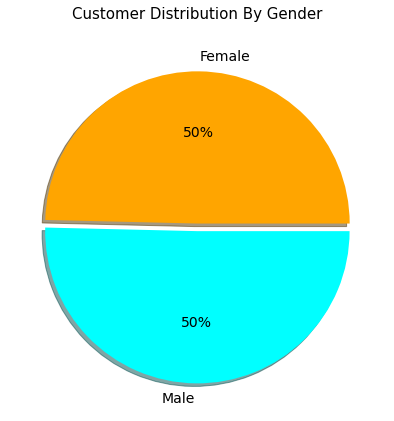

In [39]:
# Plotting Gender Attribute
plt.figure(figsize=(12,7))
explode = (0, 0.05)
plt.pie(G, colors = ( "orange", "cyan"), explode = explode, shadow = True, labels = ['Female','Male'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Customer Distribution By Gender', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ Male and Female customers are equal

In [40]:
# Customer Distribution by Marital Status
M = New_Data.groupby('MaritalStatus')['CustomerKey'].count()
M

MaritalStatus
Married    31992
Single     26197
Name: CustomerKey, dtype: int64

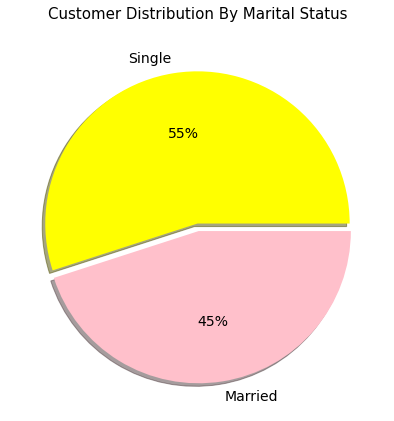

In [41]:
# Plotting Marital Status Attribute
plt.figure(figsize=(12,7))
explode = (0, 0.05)
plt.pie(M, colors = ( "yellow", "pink"), explode = explode, shadow = True, labels = ['Single','Married'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Customer Distribution By Marital Status', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ Married Customer are more than Single Customers

In [42]:
# Customer Distribution by TotalChildren 
C = New_Data.groupby('TotalChildren')['CustomerKey'].count()
C

TotalChildren
0    16474
1    11229
2    11887
3     6813
4     7367
5     4419
Name: CustomerKey, dtype: int64

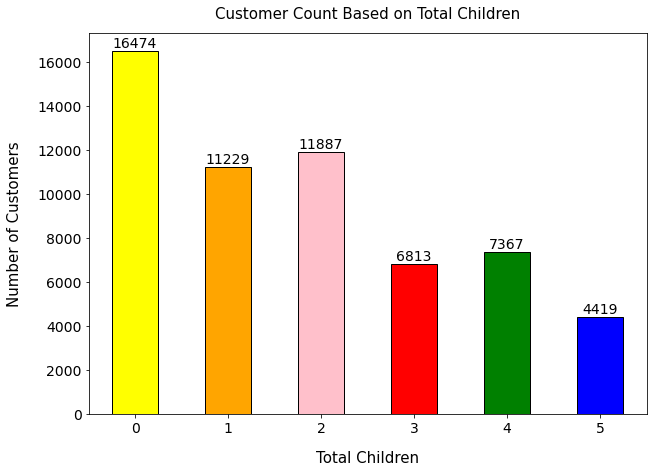

In [43]:
# Plotting TotalChildren Attribute
plt.rcParams["figure.figsize"] = (10, 7)
c = ['yellow', 'orange', 'pink', 'red', 'green', 'blue']
ax = C.plot(kind ='bar', stacked = False, color = c, rot = 0, edgecolor = 'Black', fontsize = 14)
ax.set_title("Customer Count Based on Total Children", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Total Children', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of Customers',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('0', '1', '2', '3', '4', '5'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ Customers having children less than 3 are more

In [44]:
# Customer Distribution by Education 
E = New_Data.groupby('Education')['CustomerKey'].count()
E

Education
Bachelors              17602
Graduate Degree        10231
High School             9865
Partial College        15985
Partial High School     4506
Name: CustomerKey, dtype: int64

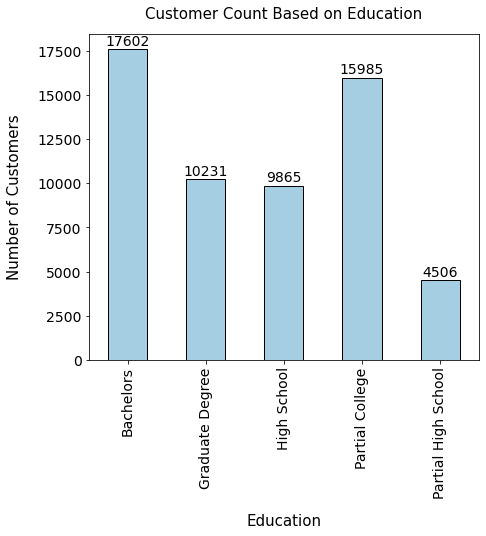

In [45]:
# Plotting Education Attribute
plt.rcParams["figure.figsize"] = (7, 6)
# c = ['yellow', 'orange', 'pink', 'red', 'green', 'blue']
ax = E.plot(kind ='bar', stacked = False, colormap = 'Paired', rot = 90, edgecolor = 'Black', fontsize = 14)
ax.set_title("Customer Count Based on Education", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Education', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of Customers',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ Most of the Customers education is Bachelors or Partial College education

In [46]:
# Customer Distribution by Occupation 
O = New_Data.groupby('Occupation')['CustomerKey'].count()
O

Occupation
Clerical           9315
Management        10175
Manual             6705
Professional      18358
Skilled Manual    13636
Name: CustomerKey, dtype: int64

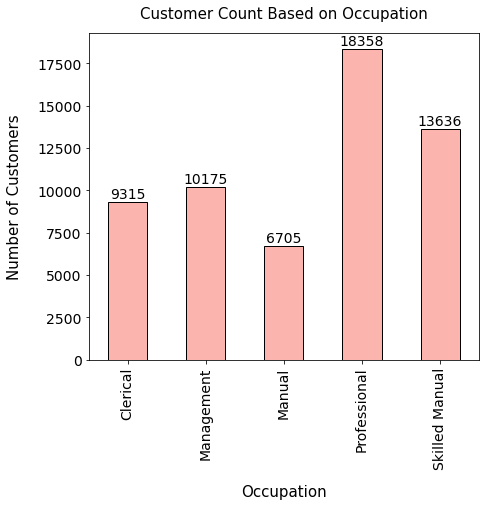

In [47]:
# Plotting Occupation Attribute
plt.rcParams["figure.figsize"] = (7, 6)
# c = ['yellow', 'orange', 'pink', 'red', 'green', 'blue']
ax = O.plot(kind ='bar', stacked = False, colormap = 'Pastel1', rot = 90, edgecolor = 'Black', fontsize = 14)
ax.set_title("Customer Count Based on Occupation", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Occupation', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of Customers',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ Most of the Customers belong to Professional, Skilled Manual and Management occupations

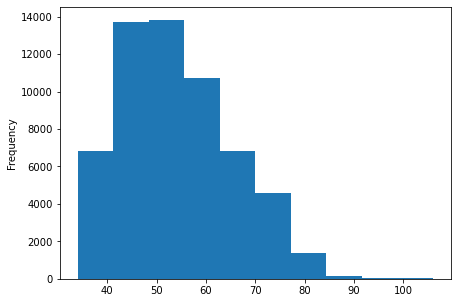

In [48]:
plt.figure(figsize=(7, 5))
New_Data['Age'].plot(kind="hist")
plt.show()

In [49]:
# Function for age groups
def age_group(row):
    if row >= 10 and row < 40:
        return 'Young Age'
    elif row >= 40 and row < 60:
        return 'Middle Age'
    elif row > 60:
        return 'Old Age'

In [50]:
# Adding Age Group Column to the dataset
New_Data['Age_Group'] = New_Data['Age'].apply(age_group)
New_Data.head()

,OrderDate,ShipDate,CustomerKey,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ModelName,StartDate,Country,Sale_Year,Sale_Month,Sale_Day,Sale_Week,Sale_Day_Name,Total_Invoice_Amount,Profit,Age,Age_Group
0,2014-01-01,2014-01-08,21768,2,1789.1350,2171.2942,3578.27,286.2616,1946-08-22,Single,Male,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,1,1,2,Wednesday,3864.5316,1406.9758,68,Old Age
1,2014-01-30,2014-02-06,21727,4,894.5675,2171.2942,3578.27,286.2616,1973-06-24,Married,Female,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,1,30,3,Thursday,3864.5316,1406.9758,41,Middle Age
2,2014-02-23,2014-02-28,21921,1,3578.2700,2171.2942,3578.27,286.2616,1961-08-02,Married,Male,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,2,23,6,Sunday,3864.5316,1406.9758,53,Middle Age
3,2014-02-28,2014-03-06,22050,1,3578.2700,2171.2942,3578.27,286.2616,1968-02-18,Single,Male,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,2,28,4,Friday,3864.5316,1406.9758,46,Middle Age
4,2014-05-18,2014-05-25,22233,2,1789.1350,2171.2942,3578.27,286.2616,1972-04-22,Married,Male,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,3578.27,Road-150,2005-07-01,Canada,2014,5,18,6,Sunday,3864.5316,1406.9758,42,Middle Age


In [51]:
# Customer Distribution by Age
AG = New_Data.groupby('Age_Group')['CustomerKey'].count()
AG

Age_Group
Middle Age    36832
Old Age       15780
Young Age      4061
Name: CustomerKey, dtype: int64

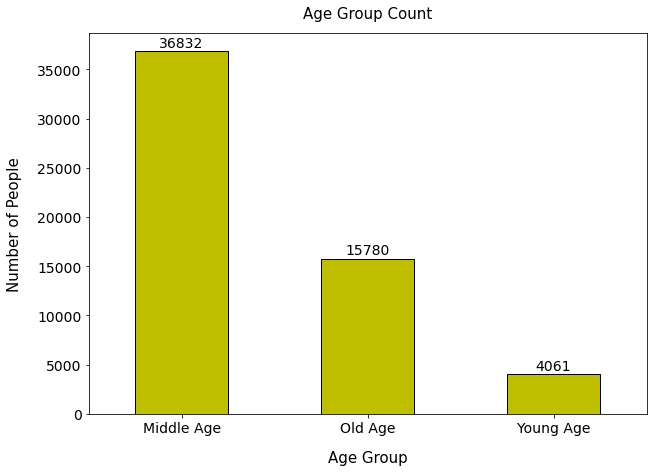

In [52]:
# Plotting AgeGroup Attribute
plt.figure(figsize=(10, 7))
ax = AG.plot(kind='bar', rot=0, color="y", edgecolor = 'Black', fontsize = 14)
ax.set_title("Age Group Count", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Middle Age', 'Old Age', 'Young Age'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__ Most of the customers belong to middle age group i.e. 40-60 years

In [53]:
# Customer Distribution by YearlyIncome
Y = New_Data.groupby('YearlyIncome')['CustomerKey'].count()
Y

YearlyIncome
10000     3233
20000     4940
30000     6722
40000     8826
50000     1914
60000     9118
70000     8004
80000     4623
90000     3035
100000    1845
110000    1691
120000    1198
130000    1852
150000     373
160000     346
170000     469
Name: CustomerKey, dtype: int64

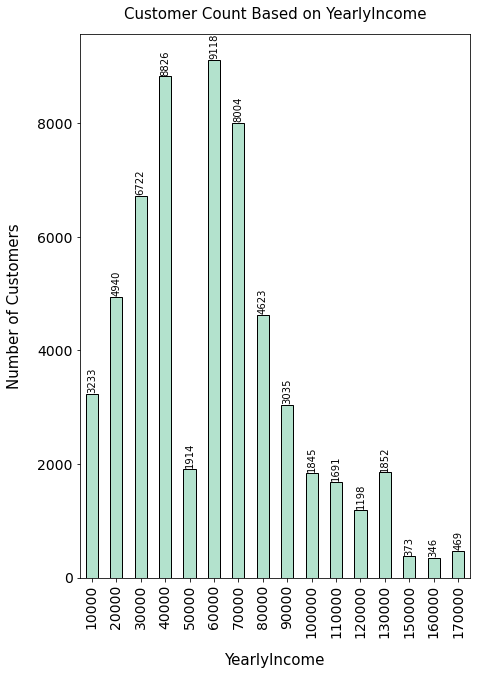

In [54]:
# Plotting YearlyIncome Attribute
plt.rcParams["figure.figsize"] = (7, 10)
# c = ['yellow', 'orange', 'pink', 'red', 'green', 'blue']
ax = Y.plot(kind ='bar', stacked = False, colormap = 'Pastel2', rot = 90, edgecolor = 'Black', fontsize = 14)
ax.set_title("Customer Count Based on YearlyIncome", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('YearlyIncome', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of Customers',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000', '100000', '110000', '120000', '130000', '150000', '160000', '170000'), fontsize = 14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10, rotation = 90)  
plt.show()

__OBSERVATION:__ Most of the Customers YearlyIncome is below 100K

There are more customers in YearlyIncome Between 10K-40K and 60K-70K

In [55]:
# Customer Distribution by Category 
C = New_Data.groupby('Category')['CustomerKey'].count()
C

Category
Accessories    34319
Bikes          15205
Clothing        8665
Name: CustomerKey, dtype: int64

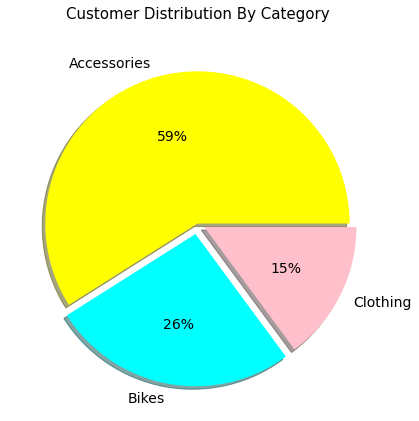

In [56]:
# Plotting Category Attribute
plt.figure(figsize=(12,7))
explode = (0, 0.07, 0.05)
plt.pie(C,  colors = ( "yellow", "cyan", "pink"), explode = explode, shadow = True, labels = ['Accessories','Bikes', 'Clothing'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Customer Distribution By Category', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ Most of the Customers buy from Accessories Category

In [57]:
# Customer Distribution by SubCategory
SC = New_Data.groupby('SubCategory')['CustomerKey'].count()
SC

SubCategory
Bike Racks             308
Bike Stands            238
Bottles and Cages     7719
Caps                  2095
Cleaners               864
Fenders               2014
Gloves                1363
Helmets               6171
Hydration Packs        706
Jerseys               3179
Mountain Bikes        4970
Road Bikes            8068
Shorts                 958
Socks                  543
Tires and Tubes      16299
Touring Bikes         2167
Vests                  527
Name: CustomerKey, dtype: int64

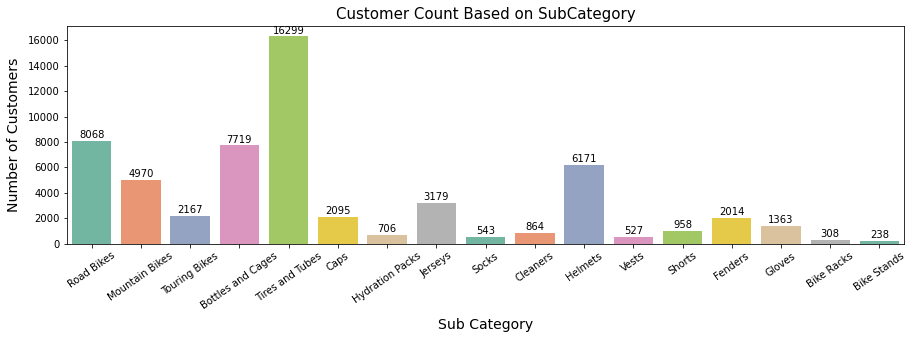

In [58]:
# Plotting SubCategory Attribute
plt.figure(figsize=(15,4))
ax = sns.countplot(x="SubCategory", data = New_Data, palette = 'Set2')
plt.title('Customer Count Based on SubCategory', fontsize = 15, pad = 7)
plt.xlabel('Sub Category', fontsize = 14, labelpad = 7)
plt.ylabel('Number of Customers', fontsize = 14, labelpad = 7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10,  rotation = 0)  
plt.show()

__OBSERVATION:__ Most of the Customers are interested to buy Tires and Tubes, Road Bikes, Bottles and Cages, Helmets

In [59]:
# Customer Distribution by CommuteDistance 
CD = New_Data.groupby('CommuteDistance')['CustomerKey'].count()
CD

CommuteDistance
0-1 Miles     20628
1-2 Miles      9773
10+ Miles      7861
2-5 Miles      9748
5-10 Miles    10179
Name: CustomerKey, dtype: int64

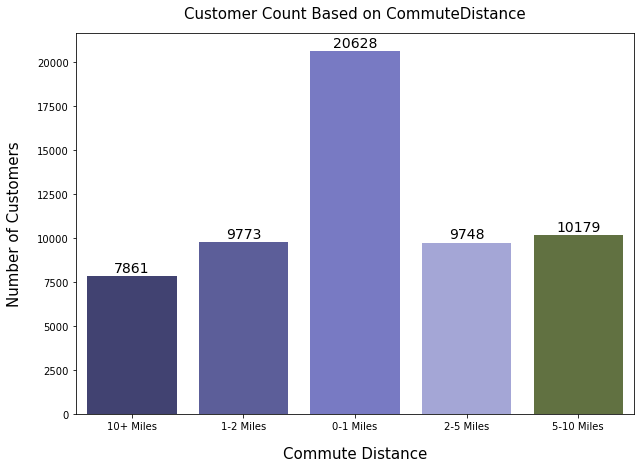

In [60]:
# Plotting CommuteDistance Attribute
plt.figure(figsize=(10,7))
ax = sns.countplot(x="CommuteDistance", data = New_Data, palette = 'tab20b')
plt.title('Customer Count Based on CommuteDistance', fontsize = 15, pad = 15)
plt.xlabel('Commute Distance', fontsize = 15, labelpad = 15)
plt.ylabel('Number of Customers', fontsize = 15, labelpad = 15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ Commute Distance 0-1 Miles have more Customer count

In [61]:
# Customer Distribution by Country 
country = New_Data.groupby('Country')['CustomerKey'].count()
country

Country
Australia         12972
Canada             7142
France             5382
Germany            5460
United Kingdom     6709
United States     20524
Name: CustomerKey, dtype: int64

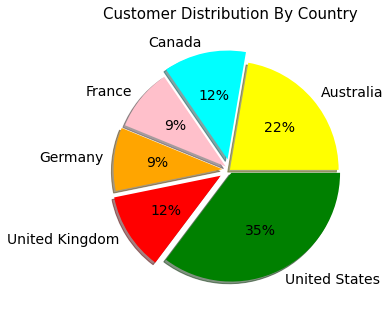

In [62]:
# Plotting Country Attribute
plt.figure(figsize=(10,5))
explode = (0, 0.1, 0.05, 0.07, 0.1, 0.03)
plt.pie(country,  colors = ( "yellow", "cyan", "pink", "orange", "red", "green"), explode = explode, shadow = True, labels = ['Australia','Canada', 'France', 'Germany', 'United Kingdom', 'United States'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Customer Distribution By Country', fontsize=15, pad = 15)
plt.show()

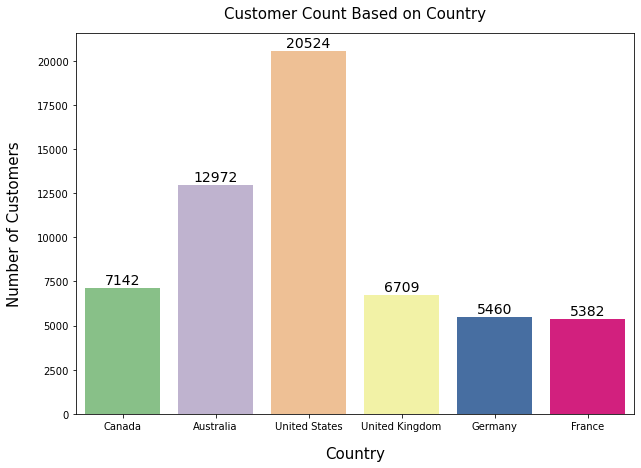

In [63]:
# Plotting Country Attribute
plt.figure(figsize=(10,7))
ax = sns.countplot(x="Country", data = New_Data, palette = 'Accent')
plt.title('Customer Count Based on Country', fontsize = 15, pad = 15)
plt.xlabel('Country', fontsize = 15, labelpad = 15)
plt.ylabel('Number of Customers', fontsize = 15, labelpad = 15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ Customers from United States and Austrailia is more than 50%

In [64]:
# Sales Distribution by Gender
Gs = New_Data.groupby('Gender')['SalesAmount'].sum()
Gs

Gender
Female    1.478780e+07
Male      1.452004e+07
Name: SalesAmount, dtype: float64

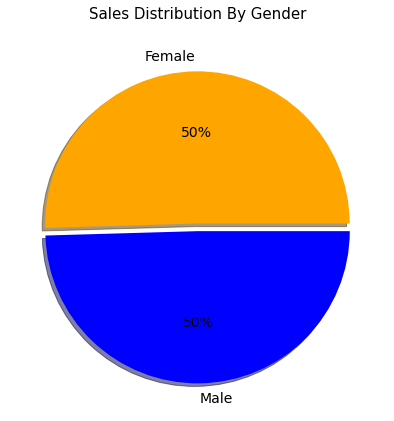

In [65]:
# Plotting Gender Attribute
plt.figure(figsize=(12,7))
explode = (0, 0.05)
plt.pie(Gs, colors = ( "orange", "blue"), explode = explode, shadow = True, labels = ['Female','Male'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Sales Distribution By Gender', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ Sales Distribution is almost same for both Male and Female 

In [66]:
# Sales Distribution by MaritalStatus
Ms = New_Data.groupby('MaritalStatus')['SalesAmount'].sum()
Ms

MaritalStatus
Married    1.515764e+07
Single     1.415020e+07
Name: SalesAmount, dtype: float64

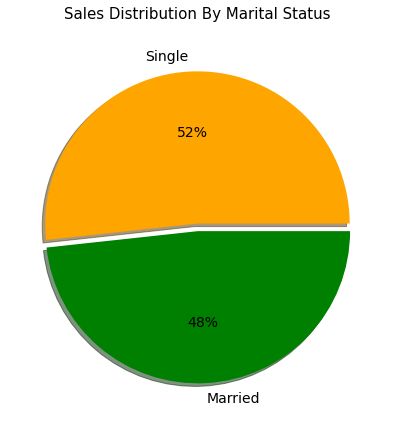

In [67]:
# Plotting MaritalStatus Attribute
plt.figure(figsize=(12,7))
explode = (0, 0.05)
plt.pie(Ms, colors = ( "orange", "green"), explode = explode, shadow = True, labels = ['Single','Married'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Sales Distribution By Marital Status', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ Sales are slightly more in married customers 52% than in single customers 48%

In [68]:
# Sales Distribution by YearlyIncome
Ys = New_Data.groupby('YearlyIncome')['SalesAmount'].sum()
Ys

YearlyIncome
10000     1.393820e+06
20000     2.006527e+06
30000     2.916437e+06
40000     4.218440e+06
50000     8.037913e+05
60000     4.222501e+06
70000     4.477908e+06
80000     2.385863e+06
90000     2.064437e+06
100000    1.070330e+06
110000    1.019157e+06
120000    7.597552e+05
130000    1.191725e+06
150000    2.411063e+05
160000    2.108731e+05
170000    3.251670e+05
Name: SalesAmount, dtype: float64

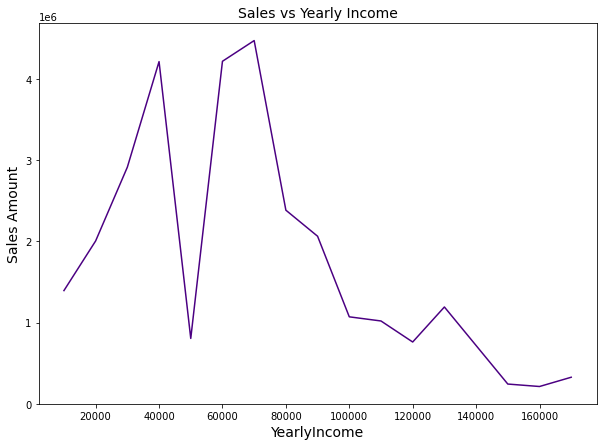

In [69]:
# Plotting YearlyIncome Attribute
plt.figure(figsize = (10, 7))
plt.xlabel('Yearly Income', size = 14)
plt.ylabel('Sales Amount', size = 14)
plt.title('Sales vs Yearly Income', fontsize = 14)
ax = Ys.plot(kind = 'line', color = 'indigo')
plt.show()

# plot(x, y, color='green', linestyle='dashed', marker='o',
#      markerfacecolor='blue', markersize=12).

__OBSERVATION:__ Sales come from most of the middle class families having Income between 30K-70K with a drop in sales seen near 50K salary customers

In [70]:
# Sales Distribution by Age Group
AGs = New_Data.groupby('Age_Group')['SalesAmount'].sum()
AGs

Age_Group
Middle Age    1.979491e+07
Old Age       6.607918e+06
Young Age     2.033142e+06
Name: SalesAmount, dtype: float64

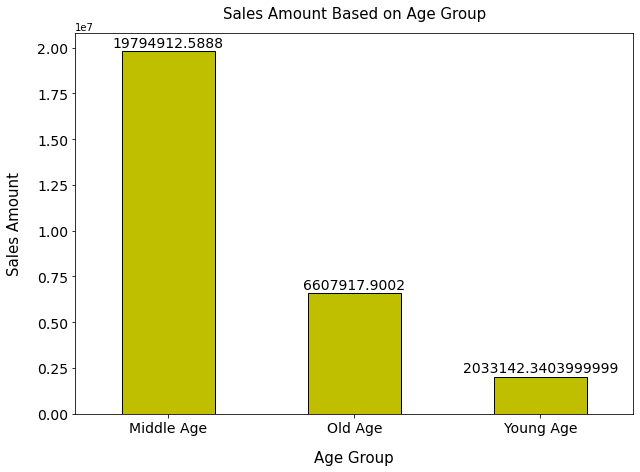

In [71]:
# Plotting Age Group Attribute
plt.figure(figsize=(10, 7))
ax = AGs.plot(kind='bar', rot=0, color="y", edgecolor = 'Black', fontsize = 14)
ax.set_title("Sales Amount Based on Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Sales Amount',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Middle Age', 'Old Age', 'Young Age'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__ Most of the Sales come from Middle Age group Customers

In [72]:
# Sales Distribution by TotalChildren
Cs = New_Data.groupby('TotalChildren')['SalesAmount'].sum()
Cs

TotalChildren
0    8.620890e+06
1    6.354426e+06
2    6.318785e+06
3    3.384289e+06
4    2.928967e+06
5    1.700480e+06
Name: SalesAmount, dtype: float64

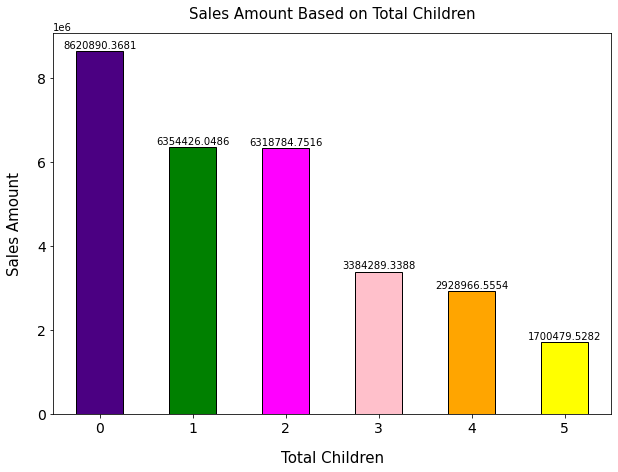

In [73]:
# Plotting TotalChildren Attribute
plt.rcParams["figure.figsize"] = (10, 7)
c = ['indigo', 'green', 'magenta', 'pink', 'orange', 'yellow']
ax = Cs.plot(kind ='bar', stacked = False, color = c, rot = 0, edgecolor = 'Black', fontsize = 14)
ax.set_title("Sales Amount Based on Total Children", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Total Children', fontsize = 15, labelpad = 15)
ax.set_ylabel('Sales Amount',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('0', '1', '2', '3', '4', '5'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10)  
plt.show()

__OBSERVATION:__ Most Sales amount come from Customers having children 0-2

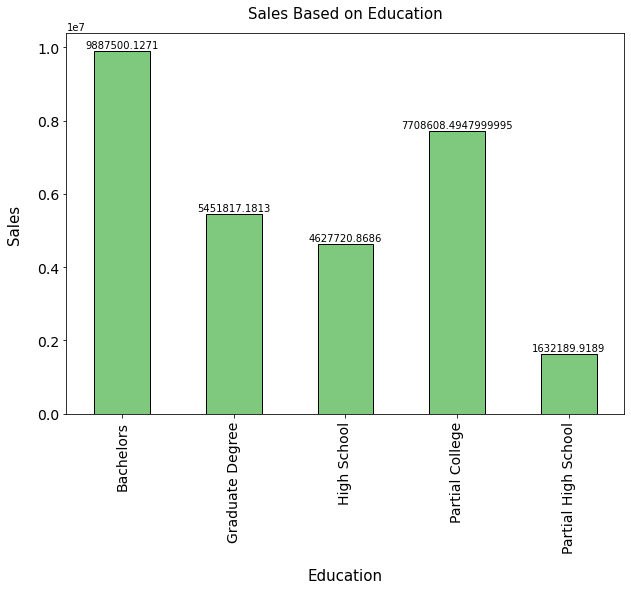

In [74]:
# Plotting Sales Distribution by Education
Es = New_Data.groupby('Education')['SalesAmount'].sum()
plt.rcParams["figure.figsize"] = (10, 7)
# c = ['indigo', 'green', 'magenta', 'pink', 'orange', 'yellow']
ax = Es.plot(kind ='bar', stacked = False, colormap = 'Accent', rot = 90, edgecolor = 'Black', fontsize = 14)
ax.set_title("Sales Based on Education", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Education', fontsize = 15, labelpad = 15)
ax.set_ylabel('Sales',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10)  
plt.show()

__OBSERVATION:__ Most of the Sales come from customers with education background as Bachelors and Partial College 

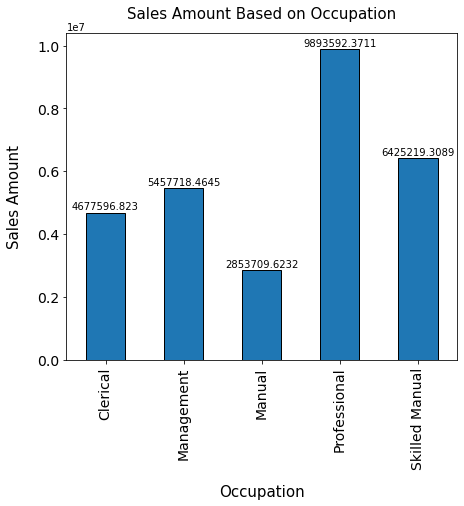

In [75]:
# Plotting Sales Distribution by Occupation
Os = New_Data.groupby('Occupation')['SalesAmount'].sum()
plt.rcParams["figure.figsize"] = (7, 6)
# c = ['yellow', 'orange', 'pink', 'red', 'green', 'blue']
ax = Os.plot(kind ='bar', stacked = False, colormap = 'tab20', rot = 90, edgecolor = 'Black', fontsize = 14)
ax.set_title("Sales Amount Based on Occupation", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Occupation', fontsize = 15, labelpad = 15)
ax.set_ylabel('Sales Amount',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10)  
plt.show()

__OBSERVATION:__ Most of the Sales are from customers belonging to Professional Occupation 

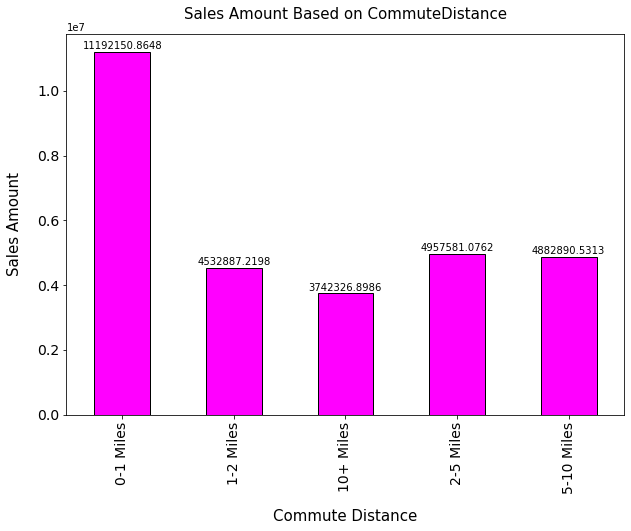

In [76]:
# Plotting Sales Distribution by CommuteDistance
CDs = New_Data.groupby('CommuteDistance')['SalesAmount'].sum()
plt.figure(figsize=(10,7))
ax = CDs.plot(kind ='bar', stacked = False, colormap = 'spring', rot = 90, edgecolor = 'Black', fontsize = 14)
# ax = sns.countplot(x="CommuteDistance", data = New_Data, palette = 'tab20b')
plt.title('Sales Amount Based on CommuteDistance', fontsize = 15, pad = 15)
plt.xlabel('Commute Distance', fontsize = 15, labelpad = 15)
plt.ylabel('Sales Amount', fontsize = 15, labelpad = 15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10)  
plt.show()

__OBSERVATION:__ More Sales if Commute Distance is smaller i.e 0-1 Miles Distance 

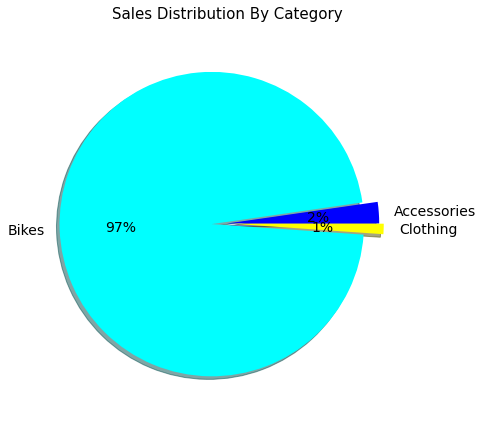

In [77]:
# Plotting Sales Distribution by Category
Category_s = New_Data.groupby('Category')['SalesAmount'].sum()
plt.figure(figsize=(12,7))
explode = (0, 0.1, 0.03)
plt.pie(Category_s,  colors = ("blue", "cyan", "yellow"), explode = explode, shadow = True, labels = ['Accessories','Bikes', 'Clothing'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Sales Distribution By Category', fontsize=15, pad = 15)
plt.show()

In [78]:
# SubCategory_s = New_Data.groupby('SubCategory')['SalesAmount'].sum()
# plt.figure(figsize=(12,7))
# plt.pie(SubCategory_s, labels = ['Road Bikes', 'Mountain Bikes', 'Touring Bikes', 'Bottles and Cages', 'Tires and Tubes', 'Caps', 'Hydration Packs', 'Jerseys', 'Socks', 'Cleaners', 'Helmets', 'Vests', 'Shorts', 'Fenders', 'Gloves', 'Bike Racks', 'Bike Stands'], autopct='%0.0f%%', textprops={'fontsize': 14})
# SubCategory_s.plot(kind="pie", label="", autopct='%0.0f%%', textprops={'size': 'x-large'}, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
# plt.title('Sales Distribution By SubCategory', fontsize=15, pad = 15)
# plt.legend(title = "Sub Category:", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))
# plt.show()

# textprops={'fontsize': 14}

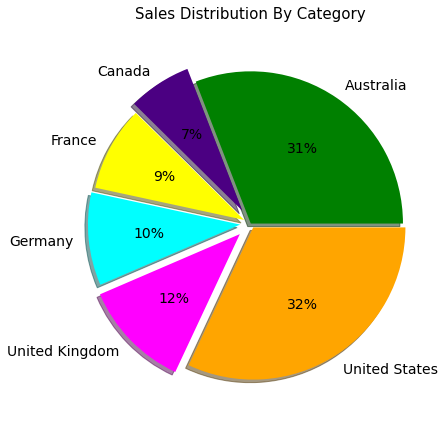

In [79]:
# Plotting Sales Distribution by Country
country_s = New_Data.groupby('Country')['SalesAmount'].sum()
plt.figure(figsize=(12,7))
explode = (0, 0.1, 0.05, 0.07, 0.1, 0.03)
plt.pie(country_s,  colors = ("green", "indigo", "yellow", "cyan", "magenta", "orange", ), explode = explode, shadow = True, labels = ['Australia','Canada', 'France', 'Germany', 'United Kingdom', 'United States'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Sales Distribution By Category', fontsize=15, pad = 15)
plt.show()

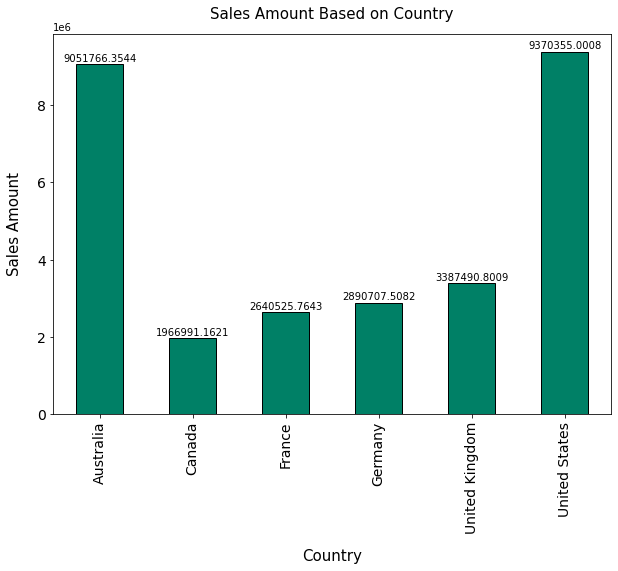

In [80]:
# Plotting Sales Distribution by Country
plt.figure(figsize=(10,7))
# ax = sns.countplot(x="Country", data = New_Data, palette = 'Accent')
ax = country_s.plot(kind ='bar', stacked = False, colormap = 'summer', rot = 90, edgecolor = 'Black', fontsize = 14)
plt.title('Sales Amount Based on Country', fontsize = 15, pad = 15)
plt.xlabel('Country', fontsize = 15, labelpad = 15)
plt.ylabel('Sales Amount', fontsize = 15, labelpad = 15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 10)  
plt.show()

__OBSERVATION:__ Most Sales is from US and Austrailia almost 63%

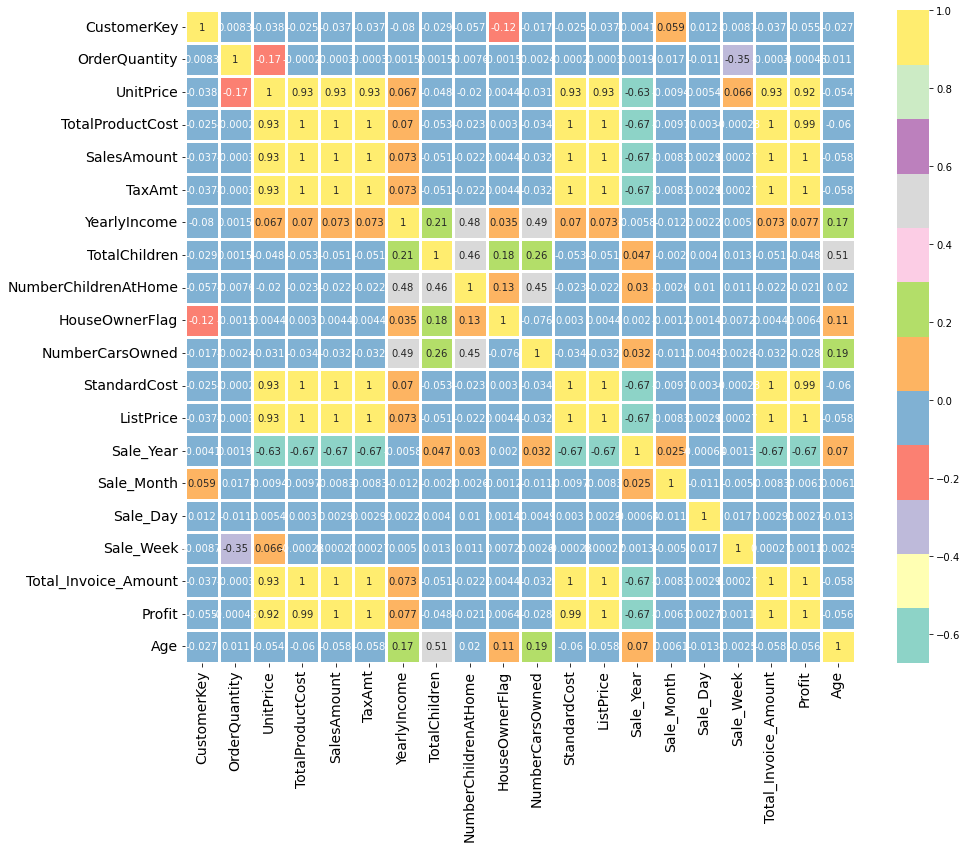

In [81]:
# Plotting Correlation Between the attributes
plt.figure(figsize = (15,12))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.heatmap(New_Data.corr(), annot = True, linewidth = 3, cmap='Set3')
plt.show()

__Summary:__
     
- Nearly 61% of Sales comes from only two Countries i.e. United States and Australia
- Customers from Middle Age group i.e. 40-60 years contribute more to  Sales generation
- Nearly 56% of the Sale happens of Black and Red color Products and 34% of Sale from products of color Silver and Yellow
- Both Gender  customers are almost same in number i.e. 50%
- Marital Status segmentation of customers is nearly same i.e. Married 51.72% and Single 48.28% 
- Sales is more from customers of Professional and Skilled Manual Occupation
- Customers with education as Bachelors and Partial College contribute more in Sales
- Sales come from category Bike nearly 96.62%   
